In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
reg_pred_loc = os.path.join('..', 'data_files', 'cv_results', 'predicted')
reg_act_loc = os.path.join('..', 'data_files', 'cv_results', 'actual')
cl_pred_loc = os.path.join('..', 'data_files', 'cv_bin_results', 'predicted')
cl_act_loc = os.path.join('..', 'data_files', 'cv_bin_results', 'actual')


In [15]:
reg_pred = np.loadtxt(reg_pred_loc)
reg_act = np.loadtxt(reg_act_loc)
cl_pred = np.loadtxt(cl_pred_loc)
cl_act = np.loadtxt(cl_act_loc)

In [16]:
reg_pred.min(), reg_pred.max()

(0.9219465851783752, 1.3181073665618896)

In [17]:
def min_max_norm(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

In [18]:
def high_low(df, hl):
    acc = (((df['Pred'] < hl) & (df['Act'] < hl)) | ((df['Pred'] > hl) & (df['Act'] > hl))).mean()
    return pd.Series([acc, len(df)], index=['Acc', 'Count'])

In [22]:
def create_binned_df(pred, act, n_bins, hl):
    norm = min_max_norm(pred)
    bin_bounds = np.linspace(0, 1, n_bins)
    bin_assign = np.digitize(norm, bin_bounds)
    bin_df = pd.DataFrame({'Pred':pred, 'Act':act, 'Bin': bin_assign})
    hl_res = bin_df.groupby('Bin').apply(lambda df: high_low(df, hl))
    return hl_res

In [23]:
n_bins = 100
reg = create_binned_df(reg_pred, reg_act, n_bins, 1)
cl = create_binned_df(cl_pred, cl_act, n_bins, 0.5)

In [29]:
support_cut = 30
reg = reg.loc[reg['Count'] > support_cut]
cl = cl.loc[cl['Count'] > support_cut]

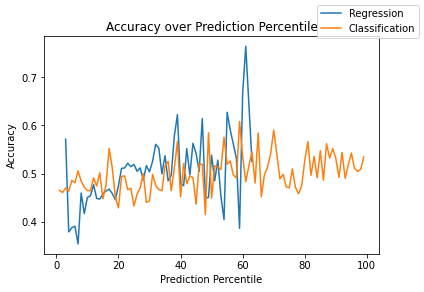

In [34]:
fig, ax = plt.subplots()
ax.plot(reg.index, reg['Acc'], label='Regression')
ax.plot(cl.index, cl['Acc'], label='Classification')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Prediction Percentile')
ax.set_title('Accuracy over Prediction Percentile')
fig.legend()